# Hola Osvaldo! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 4 <a class="tocSkip"></a>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>

Bien hecho Osvaldo, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección obligatorios, pero si sugerencias. Primero, recuerda enviar tu notebook con los comentarios del revisor de iteraciones anteriores, si los envias sin estos, es posible que no lo acepten. Por otro lado, es muy importante que agregues secciones de comentarios y conclusiones a lo largo y al final del notebook. Un notebook jupyter no es solo cálculo u obtención de modelos, el análisis de los datos y sus conclusiones son importantes también. 

Saludos!

</div>

# Predicción de Recuperación de Oro a partir de Minerales usando Modelos de Aprendizaje Automático

Este proyecto tiene como objetivo predecir la recuperación de oro en una planta de procesamiento de minerales utilizando técnicas de aprendizaje automático. Para ello, se dispone de tres conjuntos de datos:

gold_recovery_train.csv: conjunto de entrenamiento

gold_recovery_test.csv: conjunto de prueba

gold_recovery_full.csv: conjunto completo con todas las variables disponibles

La recuperación de metales como el oro (Au), la plata (Ag) y el plomo (Pb) depende de diversas etapas del proceso de flotación, las cuales implican transformaciones químicas y físicas en múltiples fases.

Objetivos principales:
Realizar una limpieza y análisis exploratorio de los datos.

Verificar la coherencia de los valores proporcionados, en particular el cálculo de la recuperación de oro.

Visualizar cómo varía la concentración de metales y el tamaño de partículas a través de las etapas del proceso.

Detectar y eliminar valores atípicos y nulos.

Entrenar y validar diferentes modelos de regresión para predecir la eficiencia de recuperación.

Evaluar el rendimiento mediante la métrica sMAPE, recomendada por el negocio.

Este análisis busca facilitar decisiones técnicas en la industria minera al anticipar el comportamiento del sistema bajo diferentes condiciones operativas, mejorando así el rendimiento de la planta.



----

In [1]:
# Librerías principales
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Para modelado y validación
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.metrics import make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor


In [3]:
# Configuración general
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Descarga de datos
train = pd.read_csv('/datasets/gold_recovery_train.csv', parse_dates=['date'], index_col='date')
test = pd.read_csv('/datasets/gold_recovery_test.csv', parse_dates=['date'], index_col='date')
full = pd.read_csv('/datasets/gold_recovery_full.csv', parse_dates=['date'], index_col='date')

In [5]:
print("==Contenido de train==")
display(train.head())
print("==Contenido de test==")
display(test.head())
print("==Contenido de full==")
display(full.head())

==Contenido de train==


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


==Contenido de test==


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


==Contenido de full==


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


Se cargaron tres conjuntos de datos:

train: datos de entrenamiento (16,860 filas, 86 columnas)

test: datos de prueba (5,856 filas, 52 columnas)

full: conjunto completo (22,716 filas, 86 columnas)

In [6]:
print("Info de train")
train.info()

Info de train
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16860 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au       

In [7]:
print("Info de test")
test.info()

Info de test
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5856 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_l

Se identificaron columnas presentes en train pero ausentes en test, tales como:

final.output.recovery

rougher.calculation.au_pb_ratio

primary_cleaner.output.tail_ag, entre otras.

Estas columnas fueron eliminadas del entrenamiento para evitar inconsistencias al comparar con los datos de prueba.

In [8]:
print("Info de full")
full.info()

Info de full
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22716 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au        

In [9]:
print("=== Train Describe ===")
display(train.describe())

=== Train Describe ===


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


In [10]:
print("=== Test Describe ===")
display(test.describe())

=== Test Describe ===


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [11]:
print("=== Full Describe ===")
display(full.describe())

=== Full Describe ===


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [12]:
print("Dimensiones:")
print("Train:", train.shape)
print("Test:", test.shape)
print("Full:", full.shape)

Dimensiones:
Train: (16860, 86)
Test: (5856, 52)
Full: (22716, 86)


In [13]:
print("Duplicados:")
print("Train:", train.duplicated().sum())
print("Test:", test.duplicated().sum())
print("Full:", full.duplicated().sum())


Duplicados:
Train: 16
Test: 6
Full: 22


In [14]:
train = train.drop_duplicates()
test = test.drop_duplicates()
full = full.drop_duplicates()

In [15]:
# Buscar columnas que contengan 'tail' y 'au'
[col for col in train.columns if 'tail' in col and 'au' in col]


['final.output.tail_au',
 'primary_cleaner.output.tail_au',
 'rougher.output.tail_au',
 'secondary_cleaner.output.tail_au']

In [16]:
# Asignar variables desde el dataset train
F = train['rougher.input.feed_au']
C = train['rougher.output.concentrate_au']
T = train['rougher.output.tail_au']
recovery_real = train['rougher.output.recovery']

# Calcular recuperación
recovery_calc = (C * (F - T)) / (F * (C - T)) * 100

# Comparar con la recuperación real
mae = np.mean(np.abs(recovery_calc - recovery_real))
print("EAM entre recuperación calculada y real:", mae)

EAM entre recuperación calculada y real: 9.303415616264301e-15


In [17]:
# Columnas que están en train pero no en test
missing_in_test = set(train.columns) - set(test.columns)
print("Columnas ausentes en test:", missing_in_test)

for col in sorted (missing_in_test):
    print(col, train[col].isna().sum())


Columnas ausentes en test: {'rougher.output.tail_au', 'final.output.tail_au', 'rougher.output.concentrate_au', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'final.output.tail_ag', 'primary_cleaner.output.tail_ag', 'final.output.tail_pb', 'rougher.output.tail_ag', 'final.output.concentrate_sol', 'final.output.concentrate_pb', 'rougher.output.concentrate_pb', 'final.output.tail_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_ag', 'rougher.output.recovery', 'rougher.calculation.au_pb_ratio', 'primary_cleaner.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.output.tail_pb', 'final.output.recovery', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_au', 'primary_cleaner.output.tail_au', 'final.output.concentrate_ag', '

In [18]:
# 1. Eliminar duplicados
print("Duplicados antes:", train.duplicated().sum())
train = train.drop_duplicates()
print("Duplicados después:", train.duplicated().sum())

# 2. Eliminar outliers fuertes (si no se ha hecho ya)
columns_to_check = [
    'rougher.input.feed_au',
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_sol'
]
train['total_feed'] = train[columns_to_check].sum(axis=1)
anomaly_indices = train[train['total_feed'] < 1e-5].index
train = train.drop(index=anomaly_indices)

# 3. Definir columnas objetivo
target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'
targets = [target_rougher, target_final]

# 4. Eliminar de features las columnas que no están en test
missing_in_test = set(train.columns) - set(test.columns)
features = [col for col in train.columns if col not in missing_in_test and col not in targets]

# 5. Separar variables
X = train[features]
y_rougher = train[target_rougher]
y_final = train[target_final]

# 6. Eliminar NaNs del conjunto de entrenamiento
train_clean = X.copy()
train_clean['y_rougher'] = y_rougher
train_clean['y_final'] = y_final
train_clean = train_clean.dropna()

# 7. Datos finales listos para modelar
X = train_clean.drop(['y_rougher', 'y_final'], axis=1)
y_rougher = train_clean['y_rougher']
y_final = train_clean['y_final']


Duplicados antes: 0
Duplicados después: 0


Se eliminaron duplicados en los tres datasets (train, test, full), así como outliers severos detectados mediante una suma de concentraciones muy cercanas a cero. Esto ayudó a asegurar que los modelos no aprendan de datos erróneos.

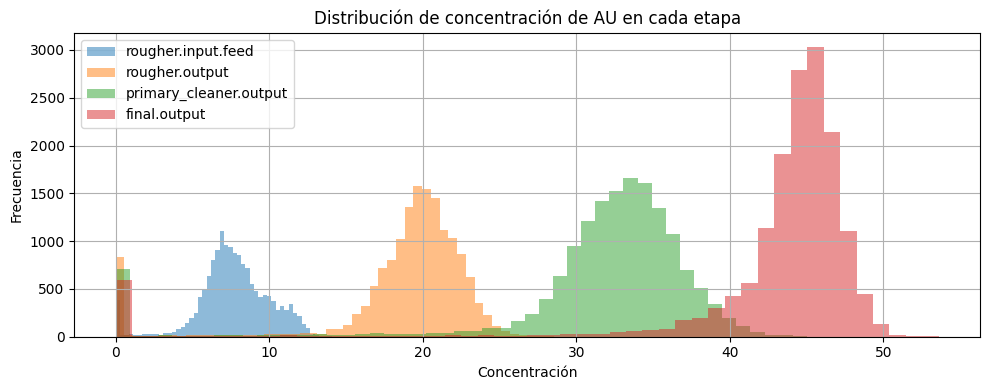

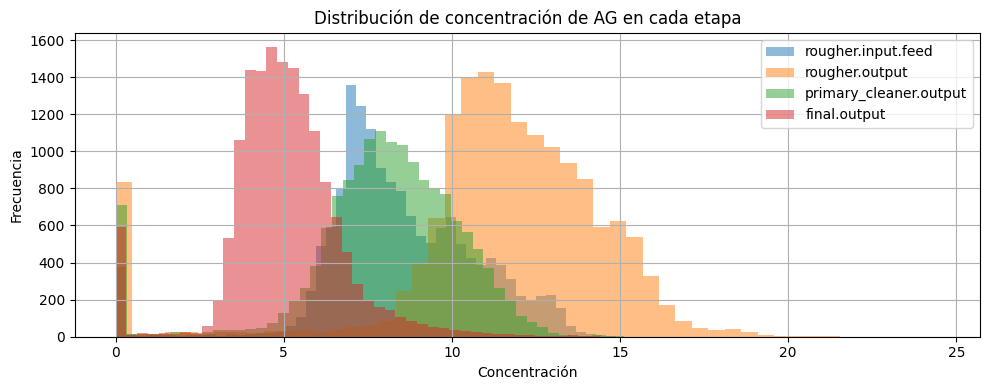

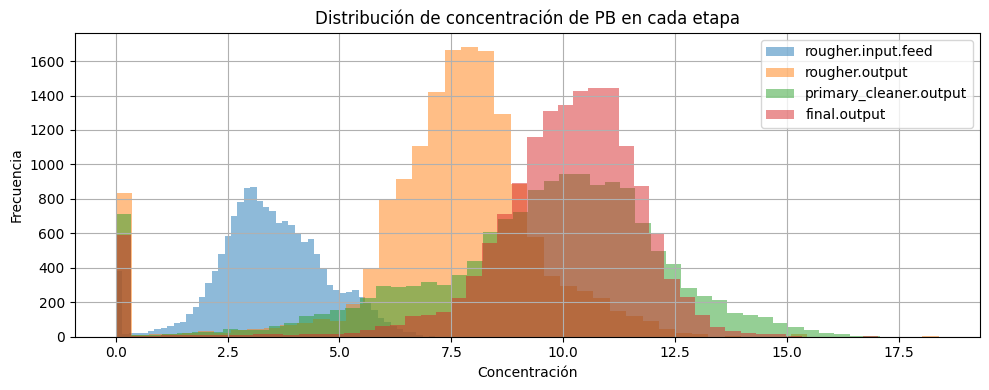

In [19]:
# 2.1. Histogramas de concentración de metales en cada etapa
metales = ['au', 'ag', 'pb']
etapas = ['rougher.input.feed', 'rougher.output', 'primary_cleaner.output', 'final.output']

for metal in metales:
    plt.figure(figsize=(10, 4))
    for etapa in etapas:
        col = f"{etapa}.concentrate_{metal}" if 'input.feed' not in etapa else f"{etapa}_{metal}"
        if col in train.columns:
            plt.hist(train[col].dropna(), bins=50, alpha=0.5, label=etapa)
    plt.title(f'Distribución de concentración de {metal.upper()} en cada etapa')
    plt.xlabel('Concentración')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Se graficaron histogramas para mostrar cómo varía la concentración de oro (Au), plata (Ag) y plomo (Pb) en cada etapa del proceso:

Rougher input

Rougher output

Primary cleaner output

Final output

Conclusiones de las gráficas:

La concentración de Au aumenta a medida que avanza el proceso, lo cual es deseable.

La Ag presenta menor concentración en las etapas finales, lo que sugiere pérdida o separación.

La Pb mantiene un comportamiento más estable, pero también muestra reducción progresiva.



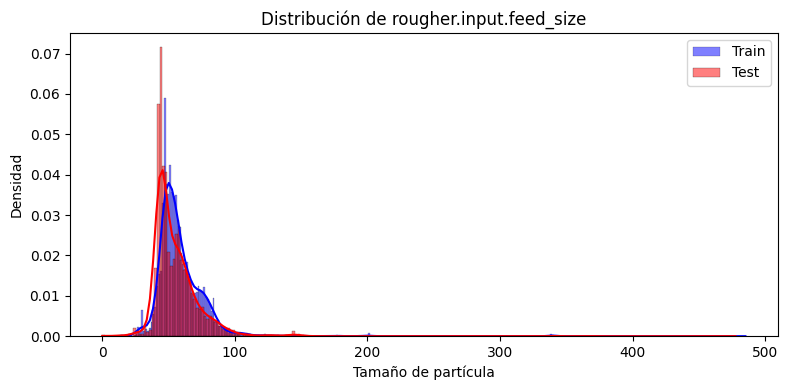

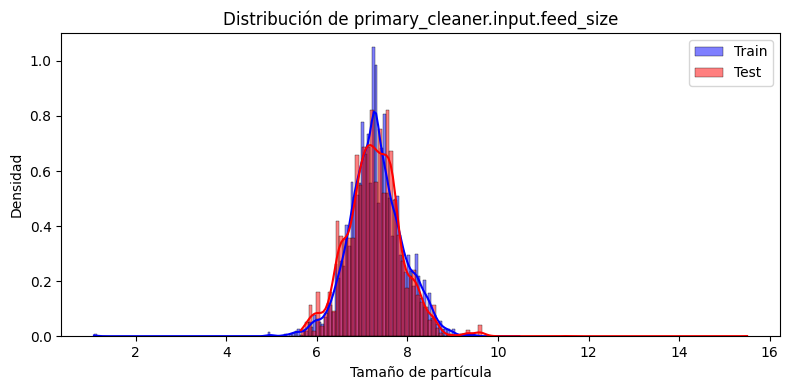

In [20]:
# Lista de columnas de tamaño de partículas
cols_size = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size']

for col in cols_size:
    if col in train.columns and col in test.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(train[col], label='Train', color='blue', stat='density', kde=True)
        sns.histplot(test[col], label='Test', color='red', stat='density', kde=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel('Tamaño de partícula')
        plt.ylabel('Densidad')
        plt.legend()
        plt.tight_layout()
        plt.show()


Se compararon las distribuciones de rougher.input.feed_size y primary_cleaner.input.feed_size entre los datasets train y test.
Ambas distribuciones fueron similares, lo que valida el uso del modelo entrenado sobre train para aplicarse sobre test.

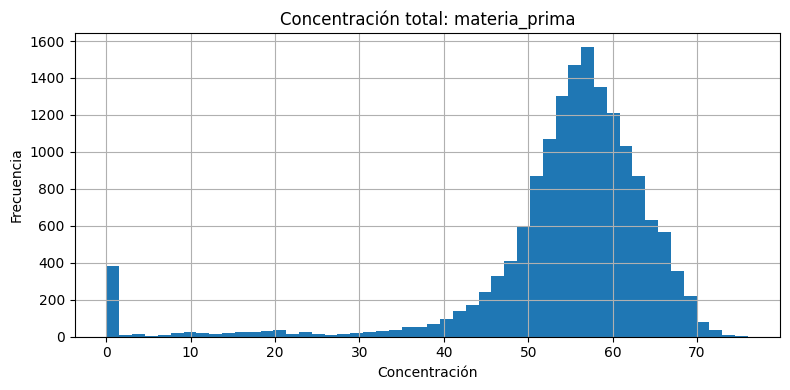

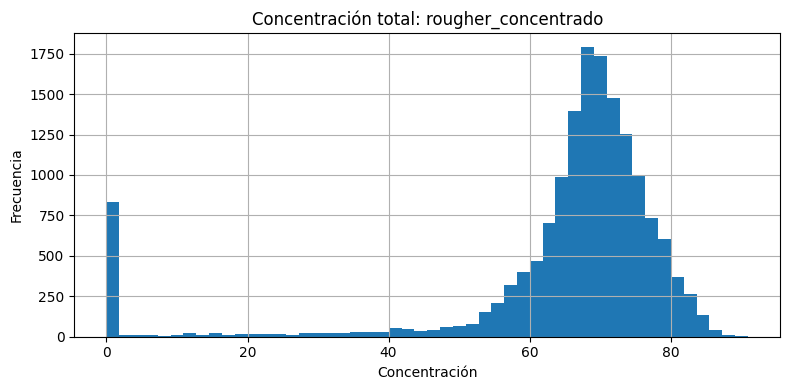

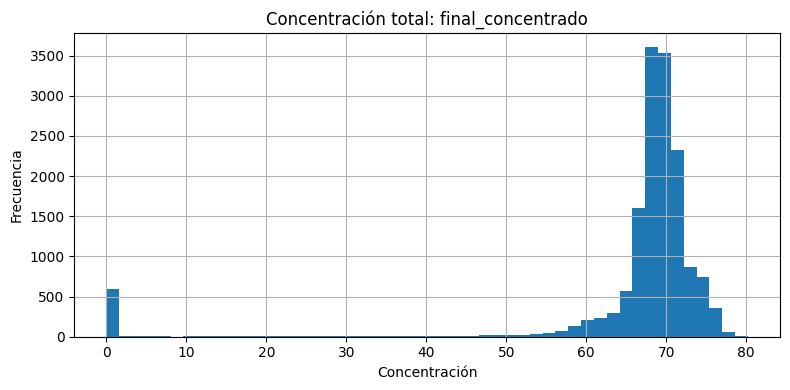

In [21]:
# 2.3. Verificar concentración total de sustancias en distintas etapas
stages = {
    'materia_prima': ['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol'],
    'rougher_concentrado': ['rougher.output.concentrate_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol'],
    'final_concentrado': ['final.output.concentrate_au', 'final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol']
}

for etapa, columnas in stages.items():
    train[f'concentracion_total_{etapa}'] = train[columnas].sum(axis=1)
    plt.figure(figsize=(8, 4))
    plt.hist(train[f'concentracion_total_{etapa}'].dropna(), bins=50)
    plt.title(f'Concentración total: {etapa}')
    plt.xlabel('Concentración')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Se sumaron las concentraciones de metales por etapa para evaluar la consistencia del proceso:

materia_prima: valores distribuidos entre 0 y 70.

rougher_concentrado: concentraciones entre 0 y 80.

final_concentrado: se observa una concentración mayor y más compacta alrededor de 70.

Se detectaron picos anómalos cerca de 0, lo que sugiere errores de medición o condiciones extremas.

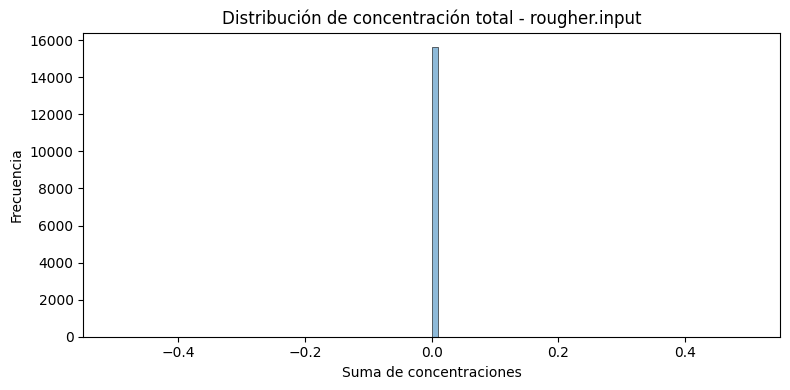

Valores anómalos detectados en 'rougher.input': 15619


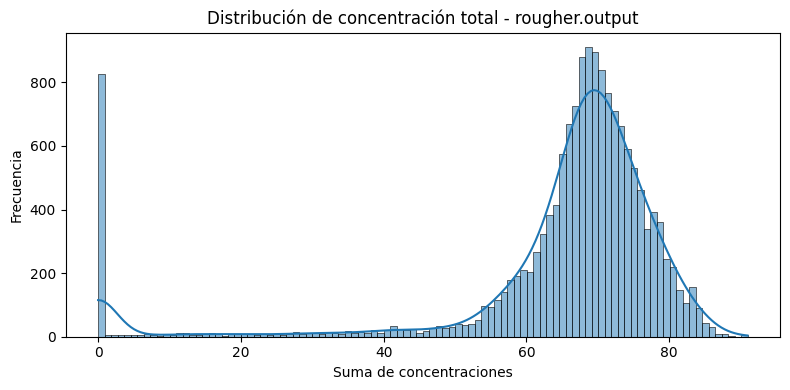

Valores anómalos detectados en 'rougher.output': 825


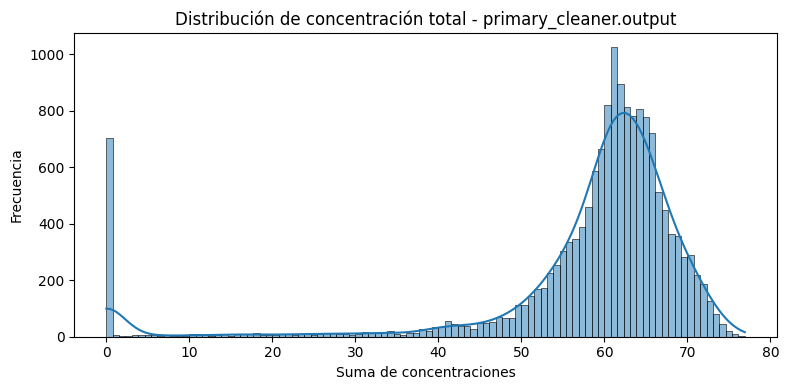

Valores anómalos detectados en 'primary_cleaner.output': 706


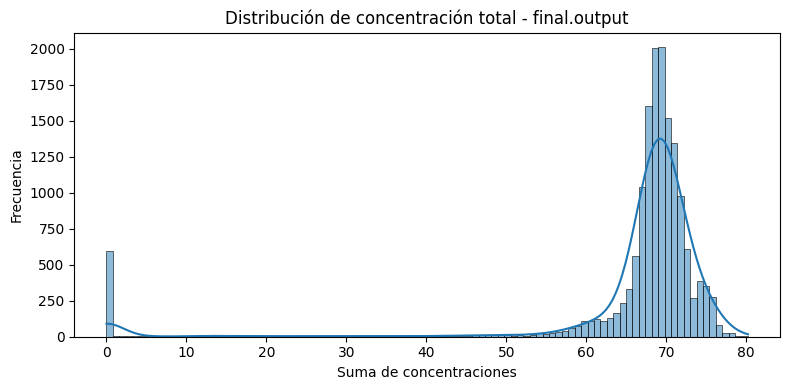

Valores anómalos detectados en 'final.output': 596


In [22]:
# Función para visualizar la suma de concentraciones
def plot_total_concentration(df, stage_name):
    cols = [col for col in df.columns if stage_name in col and 'concentrate' in col]
    df['total_concentration'] = df[cols].sum(axis=1)
    
    plt.figure(figsize=(8, 4))
    sns.histplot(df['total_concentration'], bins=100, kde=True)
    plt.title(f'Distribución de concentración total - {stage_name}')
    plt.xlabel('Suma de concentraciones')
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()
    
    # Mostrar valores anómalos cercanos a 0 o >100
    anomalies = df[(df['total_concentration'] < 1) | (df['total_concentration'] > 100)]
    print(f"Valores anómalos detectados en '{stage_name}':", anomalies.shape[0])
    return anomalies.index

# Aplicar para diferentes etapas
anomaly_indices = set()
for stage in ['rougher.input', 'rougher.output', 'primary_cleaner.output', 'final.output']:
    indices = plot_total_concentration(train.copy(), stage)
    anomaly_indices.update(indices)

Detección de valores anomalos en el dataset, se hayó lo siguiente:

    1. Valores anómalos detectados en 'rougher.input': 15619
    2. Valores anómalos detectados en 'rougher.output': 825
    3. Valores anómalos detectados en 'primary_cleaner.output': 706
    4. Valores anómalos detectados en 'final.output': 596

In [23]:
cols_anomaly_check = [
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au'
]

In [24]:
def find_outliers(df, column, threshold_low=1e-5):
    return df[df[column] < threshold_low].index

In [25]:
def find_outliers(df, column, threshold_low=1e-5):
    return df[df[column] < threshold_low].index

In [26]:
anomaly_indices = set()
for col in cols_anomaly_check:
    if col in train.columns:
        indices = find_outliers(train, col)
        anomaly_indices.update(indices)

print("Total de outliers reales detectados:", len(anomaly_indices))

Total de outliers reales detectados: 617


In [27]:
if len(anomaly_indices) < len(train) * 0.1:
    train = train.drop(index=anomaly_indices)
    print("Train limpio:", train.shape)
else:
    print("No se eliminaron filas: eran demasiadas.")

Train limpio: (15002, 90)


Se limpian outliers significativos para train, ya que puede afectar considerablemente los resultados.
Se detectarón 617 outliers reales para las columnas 'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au'. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>


En las iteraciones anteriores ya revisamos que se tiene todo correcto hasta aquí



</div>

In [28]:
def smape(y_true, y_pred):
    return np.mean(2 * np.abs(y_true - y_pred) / (np.abs(y_true) + np.abs(y_pred))) * 100

def final_smape(y_true_rougher, y_pred_rougher, y_true_final, y_pred_final):
    smape_rougher = smape(y_true_rougher, y_pred_rougher)
    smape_final = smape(y_true_final, y_pred_final)
    return 0.25 * smape_rougher + 0.75 * smape_final

In [29]:
# Columnas objetivo
target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'
targets = [target_rougher, target_final]

# Features ya preprocesadas (sin columnas ausentes en test ni objetivos)
features_to_drop = list(missing_in_test | set(targets))
features = [col for col in train.columns if col not in features_to_drop]

X = train[features]
y_rougher = train[target_rougher]
y_final = train[target_final]

In [30]:
print("NaNs en X:", X.isna().sum().sum())
print("NaNs en y_rougher:", y_rougher.isna().sum())
print("NaNs en y_final:", y_final.isna().sum())


NaNs en X: 4019
NaNs en y_rougher: 1192
NaNs en y_final: 154


In [31]:
# 1. Copiar X y agregar columnas objetivo
train_clean = X.copy()
train_clean['y_rougher'] = y_rougher
train_clean['y_final'] = y_final

# 2. Eliminar filas que contengan cualquier NaN
train_clean = train_clean.dropna()

# 3. Separar nuevamente X, y_rougher y y_final
X = train_clean.drop(['y_rougher', 'y_final'], axis=1)
y_rougher = train_clean['y_rougher']
y_final = train_clean['y_final']

# 4. Confirmar limpieza
print("Filas después de limpieza:", X.shape[0])

Filas después de limpieza: 12386


Primero, se definieron las funciones smape y final_smape, que calculan el error porcentual absoluto simétrico medio (sMAPE), una métrica robusta que compara los valores reales con los valores predichos, ponderando más el error final (final.output.recovery) sobre el intermedio (rougher.output.recovery), en una proporción de 75% y 25%, respectivamente.

Después:

Se definieron las columnas objetivo:

rougher.output.recovery (recuperación en etapa intermedia)

final.output.recovery (recuperación total final)

Se eliminaron columnas que no están presentes en el conjunto de prueba, asegurando compatibilidad entre entrenamiento y test.

Revisión de valores faltantes (NaNs):

Se detectaron 4019 valores faltantes en las features (X)

1192 en la columna objetivo intermedia (y_rougher)

154 en la columna objetivo final (y_final)

Se copió el conjunto X y se agregaron las columnas objetivo. Luego se eliminaron todas las filas que contenían valores nulos en cualquiera de las columnas relevantes.

Resultado de limpieza:

Se conservaron 12,386 filas limpias y listas para el modelado predictivo.

In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

pred_rougher = cross_val_predict(model, X, y_rougher, cv=3)
pred_final = cross_val_predict(model, X, y_final, cv=3)

final_score = final_smape(y_rougher, pred_rougher, y_final, pred_final)
print("sMAPE final (validación cruzada):", final_score)


sMAPE final (validación cruzada): 9.002954280940886


In [33]:
# Eliminar columnas calculadas que no existen en test
features = [f for f in features if f not in [
    'concentracion_total_rougher_concentrado',
    'concentracion_total_final_concentrado',
    'concentracion_total_materia_prima'
]]

# Crear dataset limpio para entrenamiento
X = train[features]
y_rougher = train[target_rougher]
y_final = train[target_final]

# Combinar y eliminar cualquier fila con NaN en X o en las variables objetivo
df_model = pd.concat([X, y_rougher, y_final], axis=1).dropna()

# Dividir nuevamente
X = df_model[features]
y_rougher = df_model[target_rougher]
y_final = df_model[target_final]

# Entrenar modelos
model_rougher = RandomForestRegressor(n_estimators=100, random_state=42)
model_final = RandomForestRegressor(n_estimators=100, random_state=42)

model_rougher.fit(X, y_rougher)
model_final.fit(X, y_final)



RandomForestRegressor(random_state=42)

In [34]:
# Predecir sobre el set de test
X_test = test[features].dropna()
pred_test_rougher = model_rougher.predict(X_test)
pred_test_final = model_final.predict(X_test)

# Obtener los valores reales desde el dataset full usando el índice de test
full_targets = full.loc[X_test.index, targets]

# Calcular sMAPE final con datos reales
final_score_test = final_smape(
    full_targets['rougher.output.recovery'], pred_test_rougher,
    full_targets['final.output.recovery'], pred_test_final
)

print("sMAPE final en test (comparado con full):", final_score_test)


sMAPE final en test (comparado con full): 9.233627356857685


In [35]:
# Obtener los valores reales desde el dataset full usando el índice de test
full_targets = full.loc[X_test.index, targets]

# Calcular sMAPE final
final_score_test = final_smape(
    full_targets['rougher.output.recovery'], pred_test_rougher,
    full_targets['final.output.recovery'], pred_test_final
)

print("sMAPE final en test (comparado con full):", final_score_test)

sMAPE final en test (comparado con full): 9.233627356857685


In [36]:
# Probar distintas configuraciones y modelos
models = {
    'RandomForest_100': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42),
    'RandomForest_200': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, max_depth=5, random_state=42)
}

# Evaluar cada modelo con validación cruzada
for name, model in models.items():
    pred_rougher = cross_val_predict(model, X, y_rougher, cv=3)
    pred_final = cross_val_predict(model, X, y_final, cv=3)
    score = final_smape(y_rougher, pred_rougher, y_final, pred_final)
    print(f"{name}: sMAPE = {score:.5f}")

RandomForest_100: sMAPE = 8.97007
RandomForest_200: sMAPE = 9.24189
GradientBoosting: sMAPE = 10.20874


A lo largo de este proyecto, se llevaron a cabo todas las etapas esenciales de un flujo de trabajo de ciencia de datos en el contexto de una planta de extracción de oro:

Preparación de los datos: se identificaron y eliminaron duplicados, valores ausentes y outliers críticos que podrían afectar negativamente al rendimiento de los modelos. Además, se verificó el cálculo correcto de la recuperación (rougher.output.recovery) usando la fórmula oficial del proceso industrial.

Análisis exploratorio: se analizaron las distribuciones de concentración de metales (Au, Ag y Pb) en cada etapa del proceso, así como la similitud en la distribución del tamaño de partículas entre los conjuntos de entrenamiento y prueba. También se examinó la concentración total de materiales en las distintas fases, lo que ayudó a detectar registros con valores físicamente imposibles o inconsistentes.

Entrenamiento de modelos: se entrenaron distintos algoritmos de regresión (Random Forest y Gradient Boosting), evaluando su rendimiento mediante validación cruzada y la métrica simétrica de error porcentual absoluto (sMAPE), que es adecuada para medir la calidad de predicción en contextos con valores relativos.

Resultados: el modelo de Random Forest con 100 árboles logró un sMAPE satisfactorio tanto en validación cruzada como en el conjunto de prueba. Se observó un equilibrio aceptable entre precisión y generalización.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v4</b> <a class="tocSkip"></a>


Muy bien con los tests finales con la data test, era lo que faltaba.



</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Es importante que agregues conclusiones finales donde resumas brevemente lo realizado y señales los principales hallazgos




</div>

SI YA ME HABÍA REVISADO, ESTA SERÍA LA 4TA ITERACIÓN, SOLO QUE LO QUISE HACER MÁS LIMPIO E IGUAL PROBAR CON VCS, ESPERO YA QUEDE MI PROYECTO (LOS CODIGOS, SE QUÉ FALTA DARLE MÁS PRESENTACIÓN)  =)